# Project: Wrangling and Analyze Data by Ikechukwu Ogbuchi

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
import pandas as pd
import re
data=pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#checking it is loaded
data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open ('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)
    
image_predictions = pd.read_csv('image-predictions.tsv',sep="\t")

In [5]:
#Checking it is loaded
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [7]:
#twitter.py code
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
#tweet_ids = df_1.tweet_id.values
#len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    #for tweet_id in tweet_ids:
        #count += 1
        #print(str(count) + ": " + str(tweet_id))
        #try:
            #tweet = api.get_status(tweet_id, tweet_mode='extended')
            #print("Success")
            #json.dump(tweet._json, outfile)
            #outfile.write('\n')
        #except tweepy.TweepError as e:
            #print("Fail")
            #fails_dict[tweet_id] = e
            #pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [8]:
#getting tweet_json file loaded
twitterdata = pd.read_json('tweet-json.txt', lines = True,encoding='utf-8')
twitterdata.head(5)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [9]:
#looking at shape
twitterdata.shape

(2354, 31)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [10]:
#visual assessment of dog data

data.head(10)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [11]:
#checking if tweets beyond August 1, 2017 are there
data['timestamp'].sort_values(axis=0, ascending=False)

0       2017-08-01 16:23:56 +0000
1       2017-08-01 00:17:27 +0000
2       2017-07-31 00:18:03 +0000
3       2017-07-30 15:58:51 +0000
4       2017-07-29 16:00:24 +0000
5       2017-07-29 00:08:17 +0000
6       2017-07-28 16:27:12 +0000
7       2017-07-28 00:22:40 +0000
8       2017-07-27 16:25:51 +0000
9       2017-07-26 15:59:51 +0000
10      2017-07-26 00:31:25 +0000
11      2017-07-25 16:11:53 +0000
12      2017-07-25 01:55:32 +0000
13      2017-07-25 00:10:02 +0000
14      2017-07-24 17:02:04 +0000
15      2017-07-24 00:19:32 +0000
16      2017-07-23 00:22:39 +0000
17      2017-07-22 16:56:37 +0000
18      2017-07-22 00:23:06 +0000
19      2017-07-21 01:02:36 +0000
20      2017-07-20 16:49:33 +0000
21      2017-07-19 16:06:48 +0000
22      2017-07-19 03:39:09 +0000
23      2017-07-19 00:47:34 +0000
24      2017-07-18 16:08:03 +0000
25      2017-07-18 00:07:08 +0000
26      2017-07-17 16:17:36 +0000
27      2017-07-16 23:58:41 +0000
28      2017-07-16 20:14:00 +0000
29      2017-0

In [12]:
#describing dog data
data.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
#checking number of null values
data.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [14]:
data.shape



(2356, 17)

In [15]:
#checking information on each variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

## accessing image prediction data

In [16]:
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
933,703356393781329922,https://pbs.twimg.com/media/CcLS6QKUcAAUuPa.jpg,1,Border_collie,0.894842,True,collie,0.097364,True,English_springer,0.003037,True
1624,803692223237865472,https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg,1,Lakeland_terrier,0.530104,True,Irish_terrier,0.197314,True,Airedale,0.082515,True
1626,804026241225523202,https://pbs.twimg.com/media/Cyh5mQTW8AQpB6K.jpg,1,web_site,0.492709,False,envelope,0.050566,False,guillotine,0.015297,False
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
644,681579835668455424,https://pbs.twimg.com/media/CXV1Ot_W8AEpkQO.jpg,1,Rottweiler,0.760671,True,Labrador_retriever,0.096585,True,Staffordshire_bullterrier,0.040333,True
1156,733460102733135873,https://pbs.twimg.com/media/Ci3GDeyUoAAKOxn.jpg,1,chow,0.931275,True,beaver,0.028831,False,dhole,0.017379,False
681,683828599284170753,https://pbs.twimg.com/media/CX1ye7HUMAADDzh.jpg,1,malamute,0.577376,True,Siberian_husky,0.287131,True,Eskimo_dog,0.117563,True
1146,730573383004487680,https://pbs.twimg.com/media/CiOEnI6WgAAmq4E.jpg,2,American_Staffordshire_terrier,0.810158,True,Labrador_retriever,0.058205,True,Weimaraner,0.027930,True
770,689289219123089408,https://pbs.twimg.com/ext_tw_video_thumb/68928...,1,snowmobile,0.254642,False,assault_rifle,0.129558,False,rifle,0.110875,False
1503,784826020293709826,https://pbs.twimg.com/media/CuRDF-XWcAIZSer.jpg,1,chow,0.090341,True,binoculars,0.083499,False,Irish_setter,0.077456,True


In [17]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [18]:
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [19]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## assessing tweet json data

In [20]:
twitterdata.tail(5)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
2349,NaN,NaN,2015-11-16 00:24:50,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...",111,False,Here we have a 1949 1st generation vulpix. Enj...,NaN,...,0.0,NaN,NaN,NaN,41,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2350,NaN,NaN,2015-11-16 00:04:52,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...",311,False,This is a purebred Piers Morgan. Loves to Netf...,NaN,...,0.0,NaN,NaN,NaN,147,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2351,NaN,NaN,2015-11-15 23:21:54,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...",128,False,Here is a very happy pup. Big fan of well-main...,NaN,...,0.0,NaN,NaN,NaN,47,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2352,NaN,NaN,2015-11-15 23:05:30,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...",132,False,This is a western brown Mitsubishi terrier. Up...,NaN,...,0.0,NaN,NaN,NaN,48,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2353,NaN,NaN,2015-11-15 22:32:08,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666020881337073664, 'id_str'...",2535,False,Here we have a Japanese Irish Setter. Lost eye...,NaN,...,0.0,NaN,NaN,NaN,532,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [21]:
#checking if data after Aug 1 is in twitter data
twitterdata['created_at'].sort_values(ascending=False)

0      2017-08-01 16:23:56
1      2017-08-01 00:17:27
2      2017-07-31 00:18:03
3      2017-07-30 15:58:51
4      2017-07-29 16:00:24
5      2017-07-29 00:08:17
6      2017-07-28 16:27:12
7      2017-07-28 00:22:40
8      2017-07-27 16:25:51
9      2017-07-26 15:59:51
10     2017-07-26 00:31:25
11     2017-07-25 16:11:53
12     2017-07-25 01:55:32
13     2017-07-25 00:10:02
14     2017-07-24 17:02:04
15     2017-07-24 00:19:32
16     2017-07-23 00:22:39
17     2017-07-22 16:56:37
18     2017-07-22 00:23:06
19     2017-07-20 16:49:33
20     2017-07-19 16:06:48
21     2017-07-19 03:39:09
22     2017-07-19 00:47:34
23     2017-07-18 16:08:03
24     2017-07-18 00:07:08
25     2017-07-17 16:17:36
26     2017-07-16 23:58:41
27     2017-07-16 20:14:00
28     2017-07-15 23:25:31
29     2017-07-15 16:51:35
               ...        
2324   2015-11-17 00:24:19
2325   2015-11-17 00:06:54
2326   2015-11-16 23:23:41
2327   2015-11-16 21:54:18
2328   2015-11-16 21:10:36
2329   2015-11-16 20:32:58
2

In [22]:
twitterdata.isnull().sum()

contributors                     2354
coordinates                      2354
created_at                          0
display_text_range                  0
entities                            0
extended_entities                 281
favorite_count                      0
favorited                           0
full_text                           0
geo                              2354
id                                  0
id_str                              0
in_reply_to_screen_name          2276
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
is_quote_status                     0
lang                                0
place                            2353
possibly_sensitive                143
possibly_sensitive_appealable     143
quoted_status                    2326
quoted_status_id                 2325
quoted_status_id_str             2325
retweet_count                       0
retweeted   

In [23]:
#descrining the data
twitterdata.describe()

,contributors,coordinates,favorite_count,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count
count,0.0,0.0,2354.000000,0.0,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,2211.0,2211.0,2.900000e+01,2.900000e+01,2354.000000
mean,NaN,NaN,8080.968564,NaN,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,0.0,0.0,8.162686e+17,8.162686e+17,3164.797366
std,NaN,NaN,11814.771334,NaN,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,0.0,0.0,6.164161e+16,6.164161e+16,5284.770364
min,NaN,NaN,0.000000,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.0,0.0,6.721083e+17,6.721083e+17,0.000000
25%,NaN,NaN,1415.000000,NaN,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,0.0,0.0,7.888183e+17,7.888183e+17,624.500000
50%,NaN,NaN,3603.500000,NaN,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.340867e+17,8.340867e+17,1473.500000
75%,NaN,NaN,10122.250000,NaN,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.664587e+17,8.664587e+17,3652.000000
max,NaN,NaN,132810.000000,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,0.0,0.0,8.860534e+17,8.860534e+17,79515.000000


In [24]:
#sampling 10 random rows
twitterdata.sample(10)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
206,NaN,NaN,2017-04-13 16:05:56,"[0, 124]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 852553437929721865, 'id_str'...",17492,False,This is Jarod. He likes having his belly brush...,NaN,...,0.0,NaN,NaN,NaN,3885,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
963,NaN,NaN,2016-07-05 20:41:01,"[0, 63]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 750429289032642560, 'id_str'...",14569,False,This is Arnie. He's a Nova Scotian Fridge Floo...,NaN,...,0.0,NaN,NaN,NaN,4947,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1766,NaN,NaN,2015-12-20 01:38:42,"[0, 115]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 678389021215707136, 'id_str'...",2044,False,This is Bella. She just learned that her final...,NaN,...,0.0,NaN,NaN,NaN,473,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1097,NaN,NaN,2016-05-27 00:32:10,"[0, 75]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 735991939804200964, 'id_str'...",3934,False,This is Maxaroni. He's curly af. Also rather f...,NaN,...,0.0,NaN,NaN,NaN,1283,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2087,NaN,NaN,2015-11-29 02:20:29,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 670789388759113729, 'id_str'...",700,False,Two obedient dogs here. Left one has extra leg...,NaN,...,0.0,NaN,NaN,NaN,255,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
336,NaN,NaN,2017-02-17 01:13:34,"[0, 129]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 832397519002988544, 'id_str'...",13126,False,This is Eevee. She wants to see how you're doi...,NaN,...,0.0,NaN,NaN,NaN,2548,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
549,NaN,NaN,2016-12-02 17:27:25,"[0, 97]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 804738744741928960, 'id_str'...",15326,False,This is Django. He accidentally opened the fro...,NaN,...,0.0,NaN,NaN,NaN,4480,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1725,NaN,NaN,2015-12-24 04:11:37,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 679877054611894272, 'id_str'...",2155,False,Meet Penelope. She's a bacon frise. Total babe...,NaN,...,0.0,NaN,NaN,NaN,726,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
248,NaN,NaN,2017-03-24 16:10:40,"[0, 75]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 845306874031476736, 'id_str'...",25225,False,This is Pickles. She's a silly pupper. Thinks ...,NaN,...,0.0,NaN,NaN,NaN,6039,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2093,NaN,NaN,2015-11-29 00:39:59,"[0, 134]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 670764092043436032, 'id_str'...",1154,False,Meet Vincent. He's a wild Adderall Cayenne. Sh...,NaN,...,0.0,NaN,NaN,NaN,466,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


### Quality issues

1.column values not well defined in image predictions p1, p2

2.Removing columns with many missing values like "retweeted_status_id", "retweeted_status_timestamp", "in_reply_to_status_id", "contributors","retweeted_status_user_id", "coordinates" and others.

3.Presence of 'None' for missing records, instead of pandas 'NaN'

4.Invalid values for 'name' column like 'an', 'a', 'such', 'Bo', 

5.'tweet_id' and 'id' columns are of type int rather than str

6.The 'text' column contains both original tweets and retweets, while we were required to work with just original tweets

7.Invalid data type for timestamp column. 

8.Some predictions are false on dogs



### Tidiness issues
1.Multiple dog stages column present

2.Datasets are separate and need to be merged into one after all cleaning

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [25]:
# Make copies of original pieces of data
data_copy=data.copy()
predictions_copy=image_predictions.copy()
twitterdata_copy=twitterdata.copy()

#### Define:

#### Code

#### Test

## Issue 1 column values not well defined in image pred

In [28]:
#correct by renaming cols p1,p2,p3 to predictions1, predictions2 and predictions3
predictions_copy=predictions_copy.rename(columns={"p1": "predictions1", "p2": "predictions2", "p3":"predictions3"})

In [29]:
#Test
predictions_copy.head(2)

,tweet_id,jpg_url,img_num,predictions1,p1_conf,p1_dog,predictions2,p2_conf,p2_dog,predictions3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


### Issue #2: Remove columns with lots of missing values

In [71]:
#delete "retweeted_status_id" column from dog copy data
data_copy=data_copy.drop(['retweeted_status_id'], axis=1)


In [27]:
data_copy.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [32]:
#code
data_copy=data_copy.drop(['retweeted_status_timestamp'], axis=1)

In [33]:
#Test
data_copy.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_user_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [34]:
#code
data_copy=data_copy.drop(['in_reply_to_status_id'], axis=1)

In [35]:
#Test
data_copy.tail(1)

,tweet_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_user_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2355,666020888022790149,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [36]:
#code
twitterdata_copy=twitterdata_copy.drop(['contributors'], axis=1)

In [37]:
twitterdata_copy.head(1)

,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,892420643555336193,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [38]:
#code
data_copy=data_copy.drop(['retweeted_status_user_id'], axis=1)

In [39]:
#test
data_copy.head(1)

,tweet_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [40]:
#code
twitterdata_copy=twitterdata_copy.drop(['coordinates'], axis=1)

In [41]:
#test 
twitterdata_copy.head(1)

,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,892420643555336193,892420643555336192,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [42]:
twitterdata_copy=twitterdata_copy.drop(['retweeted_status'], axis=1)

In [43]:
twitterdata_copy.head(1)

,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,...,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,source,truncated,user
0,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,892420643555336193,892420643555336192,...,0.0,0.0,NaN,NaN,NaN,8853,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


## Issue 3: Presence of 'None' instead of 'Nan' in missing values

In [46]:
data_copy.sample(5)

,tweet_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
168,859607811541651456,NaN,2017-05-03 03:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Sorry for the lack of posts today. I came home...,https://twitter.com/dog_rates/status/859607811...,13,10,None,None,None,None,puppo
55,881633300179243008,47384430.0,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,17,10,None,None,None,None,None
1602,685973236358713344,NaN,2016-01-09 23:55:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lorelei. She's contemplating her exist...,https://twitter.com/dog_rates/status/685973236...,11,10,Lorelei,None,None,None,None
70,879008229531029506,NaN,2017-06-25 16:07:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Beau. That is Beau's balloon. He takes...,https://twitter.com/dog_rates/status/879008229...,13,10,Beau,None,None,None,None
2290,667171260800061440,NaN,2015-11-19 02:43:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Kenneth. He likes Reese's Puffs. ...,https://twitter.com/dog_rates/status/667171260...,10,10,Kenneth,None,None,None,None


In [48]:
#Replacing None with Nan - see doggo, floofer columns and previewing
import numpy as np
data_copy.replace(to_replace="None", value=np.nan, inplace=True)
data_copy.sample(3)


,tweet_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1195,717421804990701568,NaN,2016-04-05 18:41:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ebby. She's a Zimbabwean Feta. Embarra...,https://twitter.com/dog_rates/status/717421804...,9,10,Ebby,NaN,NaN,NaN,NaN
179,857214891891077121,180670967.0,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,12,10,NaN,NaN,NaN,NaN,NaN
808,771770456517009408,NaN,2016-09-02 18:03:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Davey. He'll have your daughter home b...,https://twitter.com/dog_rates/status/771770456...,11,10,Davey,NaN,NaN,NaN,NaN


## Issue 4: presence of invalid names under name column in data

In [51]:
data_copy['name'].value_counts()

a              55
Charlie        12
Lucy           11
Cooper         11
Oliver         11
Tucker         10
Penny          10
Lola           10
Winston         9
Bo              9
Sadie           8
the             8
an              7
Daisy           7
Toby            7
Bailey          7
Buddy           7
Stanley         6
Rusty           6
Koda            6
Milo            6
Oscar           6
Jax             6
Jack            6
Dave            6
Leo             6
Scout           6
Bella           6
Louis           5
Sunny           5
               ..
Napolean        1
Enchilada       1
Cermet          1
Obi             1
Olaf            1
Eriq            1
Rudy            1
Shikha          1
infuriating     1
Jazz            1
Kollin          1
Brandy          1
Horace          1
Jerome          1
Siba            1
Cuddles         1
Poppy           1
Grizz           1
Walker          1
Jeremy          1
Bluebert        1
Alfy            1
Livvie          1
Karll           1
Alf       

In [53]:
#Removing invalid row name like Bo, a , the, an , such
data_copy=data_copy[(data_copy.name != "a") & (data_copy.name != "Bo") & (data_copy.name != "the")& (data_copy.name != "an")& (data_copy.name != "such")]

In [54]:
data_copy.name.value_counts()

Charlie     12
Cooper      11
Lucy        11
Oliver      11
Tucker      10
Lola        10
Penny       10
Winston      9
Sadie        8
Daisy        7
Toby         7
Bailey       7
Buddy        7
Oscar        6
Bella        6
Jax          6
Dave         6
Stanley      6
Scout        6
Jack         6
Leo          6
Rusty        6
Koda         6
Milo         6
Louis        5
Gus          5
very         5
Larry        5
Alfie        5
Phil         5
            ..
Cermet       1
Obi          1
Dobby        1
Eriq         1
Loomis       1
DonDon       1
Cilantro     1
Rudy         1
Brandy       1
Emmie        1
Horace       1
Jerome       1
Siba         1
Cuddles      1
Poppy        1
Grizz        1
Walker       1
Bluebert     1
Alfy         1
Livvie       1
Karll        1
Olaf         1
Alf          1
Milky        1
Keet         1
Flash        1
Josep        1
Jazz         1
Shikha       1
Scott        1
Name: name, Length: 951, dtype: int64

## Issue 5: tweet_id columns are of integer type not str

In [68]:
print(predictions_copy['tweet_id'].dtypes)
print(data_copy['tweet_id'].dtypes)
print(twitterdata_copy['id'].dtypes)

int64
int64
int64


In [69]:
#converting to string
predictions_copy['tweet_id']=predictions_copy['tweet_id'].astype(str)
data_copy['tweet_id']=data_copy['tweet_id'].astype(str)
twitterdata_copy['id']=twitterdata_copy['id'].astype(str)

In [70]:
#Confirming
print(predictions_copy['tweet_id'].dtypes)
print(data_copy['tweet_id'].dtypes)
print(twitterdata_copy['id'].dtypes)

object
object
object


## Issue 6: The 'text' column contains both original tweets and retweets, while we were required to work with just original tweets

In [82]:
#Finding index of a tweet containing True for RT
data_copy['text'].str.contains('RT')

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19       True
20      False
21      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
        ...  
2312    False
2313    False
2315    False
2316    False
2317    False
2318    False
2319    False
2320    False
2321    False
2322    False
2323    False
2324    False
2325    False
2326    False
2328    False
2329    False
2330    False
2331    False
2332    False
2336    False
2337    False
2338    False
2339    False
2340    False
2341    False
2342    False
2343    False
2344    False
2351    False
2355    False
Name: text, Length: 2276, dtype: bool

In [81]:
#Reviewing tweet with True index for RT
data_copy['text'][19]

'RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX'

In [84]:
#Knowing that retweets begin with RT and space.. check number of them
data_copy['text'].str.contains('RT ').value_counts()

False    2095
True      181
Name: text, dtype: int64

In [85]:
#Removing rows with Retweets
data_copy=data_copy[(data_copy['text'].str.contains('RT ')!= True)]

In [86]:
#Checking
data_copy['text'].str.contains('RT ').value_counts()

False    2095
Name: text, dtype: int64

## Issue 7: Data type for timestamp is not datetime

In [88]:
#Checking data type
data_copy['timestamp'].dtypes

dtype('O')

In [89]:
#converting to datetime
data_copy['timestamp']=pd.to_datetime(data_copy['timestamp'])

In [90]:
#verifying
data_copy['timestamp'].dtypes

dtype('<M8[ns]')

## Issue 8: Some predictions are false on dogs 

In [91]:
#checking for unique values in dog predictions from p1_dog, p2_dog and p3_dog from predictions data
print(predictions_copy['p1_dog'].unique())
print(predictions_copy['p2_dog'].unique())
print(predictions_copy['p3_dog'].unique())

[ True False]
[ True False]
[ True False]


In [92]:
predictions_copy.shape

(2075, 12)

In [93]:
#checking columns where all are True predictions
#fitting all into a column all_true with 1 for True and 0 for any false values
import numpy as np
predictions_copy['All_true'] = np.where((predictions_copy['p1_dog'] == True) & (predictions_copy['p2_dog'] == True)&(predictions_copy['p3_dog'] == True)
                     , 1, 0)
predictions_copy.head(1)

,tweet_id,jpg_url,img_num,predictions1,p1_conf,p1_dog,predictions2,p2_conf,p2_dog,predictions3,p3_conf,p3_dog,All_true
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,1


In [94]:
#counting how many rows are True in all predictions
predictions_copy['All_true'].value_counts()

1    1243
0     832
Name: All_true, dtype: int64

In [95]:
#Deleting all rows where they do not match
predictions_copy = predictions_copy[predictions_copy['All_true'] != 0]

In [96]:
#Double checking only true values left
predictions_copy['All_true'].value_counts()

1    1243
Name: All_true, dtype: int64

## Removing all other unnecessary rows

In [97]:
data_copy.isnull().sum()

tweet_id                  0
in_reply_to_user_id    2017
timestamp                 0
source                    0
text                      0
expanded_urls            58
rating_numerator          0
rating_denominator        0
name                    676
doggo                  2009
floofer                2085
pupper                 1869
puppo                  2070
dtype: int64

In [98]:
#removing in_reply_to_user_id and retweeted_status_timestamp from dog data
data_copy=data_copy.drop(['in_reply_to_user_id'], axis=1)
data_copy.isnull().sum()

tweet_id                 0
timestamp                0
source                   0
text                     0
expanded_urls           58
rating_numerator         0
rating_denominator       0
name                   676
doggo                 2009
floofer               2085
pupper                1869
puppo                 2070
dtype: int64

In [99]:
#checking twitter data
twitterdata_copy.isnull().sum()

created_at                          0
display_text_range                  0
entities                            0
extended_entities                 281
favorite_count                      0
favorited                           0
full_text                           0
geo                              2354
id                                  0
id_str                              0
in_reply_to_screen_name          2276
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
is_quote_status                     0
lang                                0
place                            2353
possibly_sensitive                143
possibly_sensitive_appealable     143
quoted_status                    2326
quoted_status_id                 2325
quoted_status_id_str             2325
retweet_count                       0
retweeted                           0
source                              0
truncated   

In [100]:
#tidying up twitter data
twitterdata_copy=twitterdata_copy.drop(['in_reply_to_screen_name','geo','in_reply_to_status_id',"in_reply_to_status_id_str",'in_reply_to_user_id','in_reply_to_user_id_str','place','quoted_status','quoted_status_id','quoted_status_id_str'], axis=1)

In [101]:
#testing 
twitterdata_copy.isnull().sum()

created_at                         0
display_text_range                 0
entities                           0
extended_entities                281
favorite_count                     0
favorited                          0
full_text                          0
id                                 0
id_str                             0
is_quote_status                    0
lang                               0
possibly_sensitive               143
possibly_sensitive_appealable    143
retweet_count                      0
retweeted                          0
source                             0
truncated                          0
user                               0
dtype: int64

In [102]:
#checking predictions data
predictions_copy.isnull().sum()
#All good

tweet_id        0
jpg_url         0
img_num         0
predictions1    0
p1_conf         0
p1_dog          0
predictions2    0
p2_conf         0
p2_dog          0
predictions3    0
p3_conf         0
p3_dog          0
All_true        0
dtype: int64

## Tidiness Issues 1: Multiple dog stages column present

In [103]:
#checking separate dog stage columns
data_copy.sample(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1198,716802964044845056,2016-04-04 01:41:58,"<a href=""http://twitter.com/download/iphone"" r...",This is Link. He struggles with couches. 10/10...,https://twitter.com/dog_rates/status/716802964...,10,10,Link,NaN,NaN,NaN,NaN


In [105]:
#merging doggo, floofer, pupper and puppo stages
data_copy['merged_dogstage']= data_copy['floofer'].fillna('') + data_copy['doggo'].fillna('') + data_copy['pupper'].fillna('') + data_copy['puppo'].fillna('')

data_copy['merged_dogstage'].replace(to_replace='', value=np.nan, inplace=True)

data_copy.drop(['floofer', 'doggo','pupper', 'puppo'], axis=1, inplace=True )

In [106]:
#checking all okay and merged column
data_copy.sample(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,merged_dogstage
346,831926988323639298,2017-02-15 18:03:45,"<a href=""http://twitter.com/download/iphone"" r...",@UNC can confirm 12/10,NaN,12,10,NaN,NaN


## Tidiness 2: Separate Datasets Needs to Merged to one

In [107]:
#to merge all of these into one file, I have to rename the id column in twitterdata
twitterdata_copy=twitterdata_copy.rename(columns={"id": "tweet_id"})

In [108]:
#Merging all separate datasets and naming as combined
combined=twitterdata_copy.merge(predictions_copy,on='tweet_id').merge(data_copy,on='tweet_id')

In [109]:
#previewing
combined.head(2)

,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,tweet_id,id_str,is_quote_status,...,p3_dog,All_true,timestamp,source_y,text,expanded_urls,rating_numerator,rating_denominator,name,merged_dogstage
0,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,892177421306343426,892177421306343424,False,...,True,1,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
1,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,891815181378084864,False,...,True,1,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [110]:
#storing combined data 
combined.to_csv('twitter_archive_master.csv',index=False, encoding = 'utf-8')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [111]:
#Analysis of predicted data
predictions_copy.head(5)

,tweet_id,jpg_url,img_num,predictions1,p1_conf,p1_dog,predictions2,p2_conf,p2_dog,predictions3,p3_conf,p3_dog,All_true
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,1
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,1
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,1
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,1
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,1


In [112]:
#checking unique dogs in prediction 1
predictions_copy['predictions1'].unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher', 'Bernese_mountain_dog',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'Italian_greyhound', 'Maltese_dog', 'malamute',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'toy_terrier', 'Blenheim_spaniel',
       'Pembroke', 'curly-coated_retriever', 'dalmatian', 'Ibizan_hound',
       'Border_collie', 'Labrador_retriever', 'miniature_schnauzer',
       'Chesapeake_Bay_retriever', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'Rottweiler',
       'Siberian_husky', 'papillon', 'Saint_Bernard', 'Tibetan_terrier',
       'beagle', 'Yorkshire_terrier', 'Pomeranian', 'kuvasz',
       'flat-coated_retriever', 'Norwegian_elkhound', 'chow',
       'standard_poodle', 'Staffordshire_bullterrier', 'basenji',
       'Lakelan

In [113]:
#find the number associated with the unique dogs
predictions_copy['predictions1'].value_counts()

golden_retriever                  126
Pembroke                           78
Labrador_retriever                 77
Chihuahua                          54
pug                                41
Pomeranian                         28
Samoyed                            27
chow                               27
toy_poodle                         27
malamute                           26
cocker_spaniel                     25
miniature_pinscher                 21
French_bulldog                     20
beagle                             18
Staffordshire_bullterrier          17
Siberian_husky                     17
German_shepherd                    17
Cardigan                           16
Maltese_dog                        15
Shetland_sheepdog                  15
Chesapeake_Bay_retriever           15
Shih-Tzu                           15
Rottweiler                         15
Lakeland_terrier                   14
Eskimo_dog                         14
Italian_greyhound                  13
American_Sta

In [114]:
#checking second predictions
predictions_copy['predictions2'].value_counts()

Labrador_retriever                74
Cardigan                          64
golden_retriever                  58
Chihuahua                         33
French_bulldog                    31
Chesapeake_Bay_retriever          31
Siberian_husky                    30
Pomeranian                        29
collie                            27
miniature_poodle                  27
beagle                            27
cocker_spaniel                    27
toy_poodle                        26
kuvasz                            23
Eskimo_dog                        23
Pembroke                          20
American_Staffordshire_terrier    18
malinois                          18
Samoyed                           17
miniature_pinscher                17
Pekinese                          16
Italian_greyhound                 16
toy_terrier                       16
chow                              15
Boston_bull                       15
Irish_terrier                     14
Staffordshire_bullterrier         14
G

In [115]:
#testing highest in predictions3
predictions_copy['predictions3'].value_counts()

Labrador_retriever                64
Chihuahua                         49
golden_retriever                  34
Eskimo_dog                        32
kelpie                            30
Staffordshire_bullterrier         29
kuvasz                            28
Pekinese                          27
cocker_spaniel                    26
beagle                            25
Chesapeake_Bay_retriever          24
Great_Pyrenees                    24
Pomeranian                        22
French_bulldog                    22
chow                              22
American_Staffordshire_terrier    21
toy_poodle                        21
malamute                          21
basenji                           18
bull_mastiff                      18
toy_terrier                       18
Pembroke                          17
Cardigan                          16
Boston_bull                       15
boxer                             15
Siberian_husky                    14
Shetland_sheepdog                 14
L

### Insights:
1.For prediction1 , the golden retriever was most predicted dog followed by Pembroke

2.For prediction 2, the labrador retriever was most predicted, followed by Cardigan

3.For prediction 3,the labrador retriever followed by Chihuahua were most predicted dogs

### Visualization

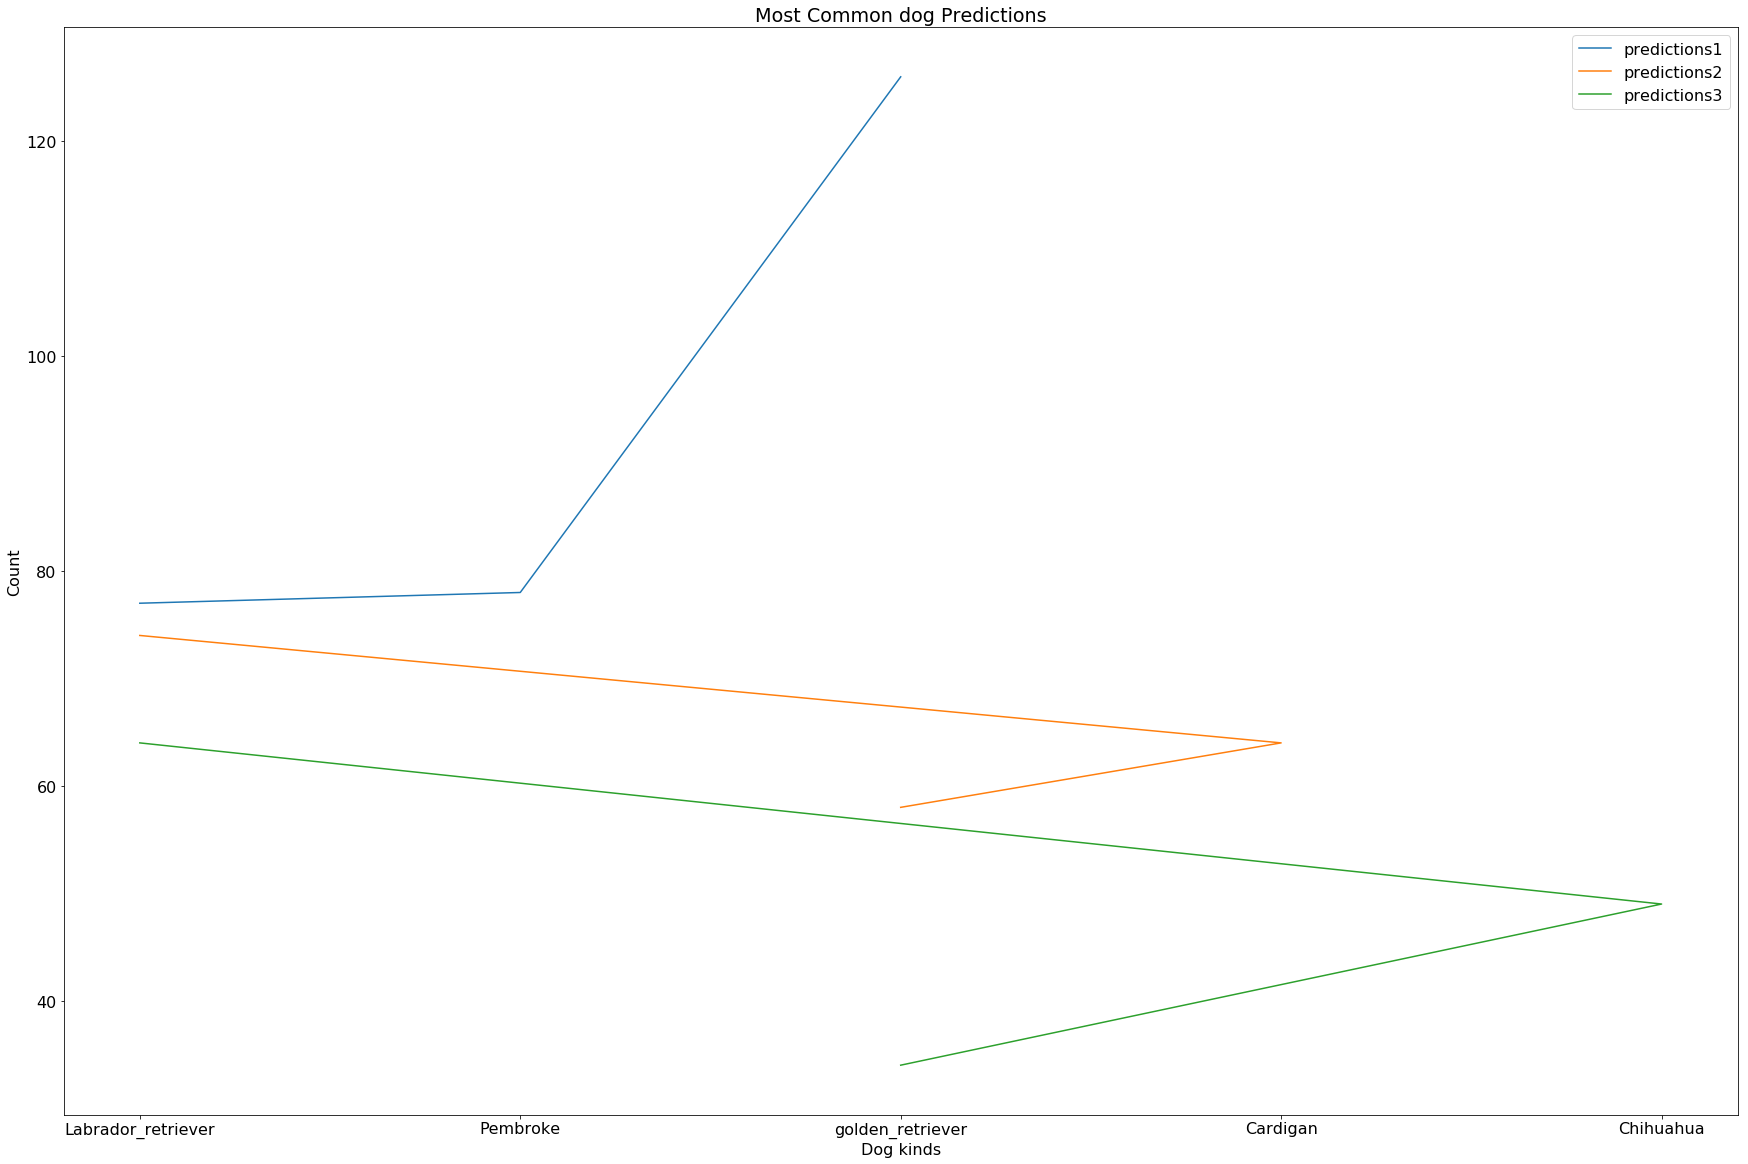

In [140]:
import matplotlib.pyplot as plt
%matplotlib inline
#create plot showing most predicted dog in predictions data from prediction 1
plt.figure(figsize=(30, 20))
plt.rcParams.update({'font.size': 16})
plt.title('Most Common dog Predictions')
plt.xlabel('Dog kinds')
plt.ylabel('Count')

plt.plot(predictions_copy['predictions1'].value_counts()[:3])
plt.plot(predictions_copy['predictions2'].value_counts()[:3])
plt.plot(predictions_copy['predictions3'].value_counts()[:3])
plt.legend()

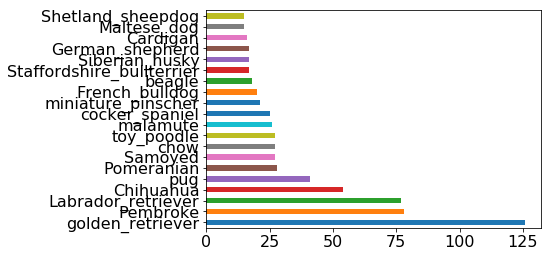

In [131]:
predictions_copy['predictions1'].value_counts()[:20].plot(kind='barh')

In [121]:
combined['merged_dogstage'].value_counts()

pupper          113
doggo            38
puppo            18
doggopupper       6
floofer           6
doggopuppo        1
flooferdoggo      1
Name: merged_dogstage, dtype: int64

In [124]:
combined['merged_dogstage'].describe()

count        183
unique         7
top       pupper
freq         113
Name: merged_dogstage, dtype: object